# Fashion MNIST Dataset - CNN Models

The fashion mnist dataset is a popular dataset which can be used as a starting point for evaluating your image classification algorithm. 

The dataset is easily downloadable by importing the tf/keras dataset module.

The following are the basic information we know about the dataset
- this is a dataset which consists of clothing images
- 60000 images in training set
- 10000 images in test set
- each image is 28x28 pixel
- these are grayscale images
- there are 9 categories


In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold

### Load the dataset and checkout the shape

In [2]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images.shape, test_images.shape

4423680/4422102 [==============================] - 1s 0us/step


((60000, 28, 28), (10000, 28, 28))

### Take a look at some of the images in the dataset

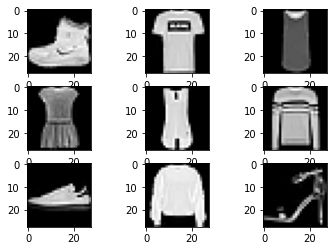

In [3]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(training_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

## Dataset preparation

- Since each pixel value is in the range of 0 to 255, we need to normalize the values into the range of 0 to 1 by dividing by the max value.
- for different model we might need to one hot encode the data labels

In [4]:
# the following code is adapted from
# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

def load_dataset(one_hot_encode=False):
    (trainX, trainY), (testX, testY) = mnist.load_data()
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    if one_hot_encode:
        # one hot encode target values
        trainY = to_categorical(trainY)
        testY = to_categorical(testY)
    return trainX, trainY, testX, testY

def prep_pixels(train, test):
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm


In [5]:
def cnn_categorical_model():
    model = tf.keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = baseline_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]        
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        
        # append score and history
        scores.append(acc)
        histories.append(history)
    return scores, histories

def run_test_harness():
    trainX, trainY, testX, testY = load_dataset(one_hot_encode=True)
    trainX, testX = prep_pixels(trainX, testX) 
    
    model = cnn_categorical_model()
    model.fit(trainX, trainY, epochs=5)

	# evaluate model
	#scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	#summarize_diagnostics(histories)
	# summarize estimated performance
	#summarize_performance(scores)
    



## CNN Categorical Model

In [6]:
trainX, trainY, testX, testY = load_dataset(one_hot_encode=True)
trainX, testX = prep_pixels(trainX, testX) 
    
model = cnn_categorical_model()
model.fit(trainX, trainY, epochs=5)

test_loss = model.evaluate(testX, testY)
print(test_loss)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5616 - accuracy: 0.7996
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2846 - accuracy: 0.8972
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2432 - accuracy: 0.9084
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2121 - accuracy: 0.9220
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.2703 - accuracy: 0.9043
[0.2703360617160797, 0.9042999744415283]


## activation images

take a look at how each convoluted and pooled layer of neurons are activated

model has 5 layers
layer 0, shape = (1, 26, 26, 32)
layer 1, shape = (1, 13, 13, 32)


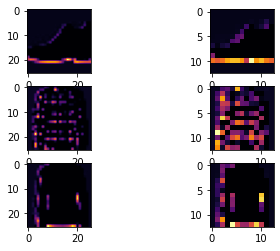

In [7]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 2)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
print('model has {} layers'.format(len(layer_outputs)))
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
for x in range(0, 2):
  f1 = activation_model.predict(testX[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  print('layer {}, shape = {}'.format(x, f1.shape))

  f2 = activation_model.predict(testX[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
  f3 = activation_model.predict(testX[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

## Simple model with a dense layer

In [8]:
def simple_dense_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
trainX, trainY, testX, testY = load_dataset(one_hot_encode=False)
trainX, testX = prep_pixels(trainX, testX) 
model = simple_dense_model()
model.fit(training_images, training_labels, epochs=1)
test_loss = model.evaluate(testX, testY)
print(test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 2.3687 - accuracy: 0.1055
[2.3687338829040527, 0.10553114861249924]


## CNN model

The following is a cnn model from the coursera ai course.  

For this model we do not need to one hot encode the training labels in the dataset. Also note that because we use 2 conv2d layers with 64 filters, it will require more calculation time to complete each epoch.

In [10]:
# the following model is from the coursera ai course
def cnn_sparse_categorical_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
trainX, trainY, testX, testY = load_dataset(one_hot_encode=False)
trainX, testX = prep_pixels(trainX, testX) 

model = cnn_sparse_categorical_model()
model.summary()
model.fit(trainX, trainY, epochs=5)

test_loss = model.evaluate(testX, testY)
print(test_loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

## activation images

take a look at how each convoluted and pooled layer of neurons are activated

model has 7 layers
layer 0, shape = (1, 26, 26, 64)
layer 1, shape = (1, 13, 13, 64)
layer 2, shape = (1, 11, 11, 64)
layer 3, shape = (1, 5, 5, 64)


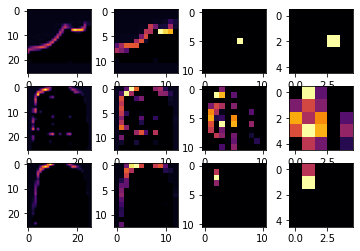

In [12]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
print('model has {} layers'.format(len(layer_outputs)))
activation_model = tf.keras.models.Model(inputs = model.input, outputs=layer_outputs)
for x in range(0, 4):
  f1 = activation_model.predict(testX[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  print('layer {}, shape = {}'.format(x, f1.shape))

  f2 = activation_model.predict(testX[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
    
  f3 = activation_model.predict(testX[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)